In [1]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE 
from sklearn import svm

Using TensorFlow backend.


In [2]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
train_data =pd.read_csv(r'C:\Users\liewm\Documents\BT4240 Machine Learning\Project\donorsnlp1.csv')
train_data=train_data.drop(columns=['Unnamed: 0'])
train_data.head(2)

C:\Users\liewm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors,Combined Project Essay,essay_processed,need_processed
0,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Counter({'Music & The Arts': 1, 'Health & Spor...","Counter({'Performing Arts': 1, 'Team Sports': 1})",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Our elementary school is a culturally rich sch...,elementary school rich school diverse populati...,student need matching shirt wear dance perform...
1,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Counter({'Applied Learning': 1, 'Literacy & La...","Counter({'Character Education': 1, 'Literature...",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,My kids tell me each day that they want to mak...,kid tell day want make happy teacher respectfu...,student need tablet order communicate virtual ...


## Feature Selection

In [4]:
train_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'description', 'total_cost', 'Project Resource Category',
       'Project Need Statement', 'proj_cat_Music & The Arts',
       'proj_cat_Health & Sports', 'proj_cat_Applied Learning',
       'proj_cat_Literacy & Language', 'proj_cat_Math & Science',
       'proj_cat_Special Needs', 'proj_cat_History & Civics',
       'proj_cat_Warmth', 'proj_cat_Care & Hunger',
       'proj_sub_cat_Performing Arts', 'proj_sub_cat_Team Sports',
       'proj_sub_cat_Character Education', 'proj_sub_cat_Literature & Writing',
       'proj_sub_cat_Mathematics', 'proj_sub_cat_Literacy',
       'proj_su

In [5]:
train_df = train_data.select_dtypes(exclude=['object','category'])
print(len(train_df.columns))
print(train_df.dtypes.unique())
cat_columns = [col for col in train_df.columns if 'cat' in col]
train_df.columns

54
[dtype('float64')]


Index(['teacher_number_of_previously_posted_projects', 'project_is_approved',
       'total_cost', 'proj_cat_Music & The Arts', 'proj_cat_Health & Sports',
       'proj_cat_Applied Learning', 'proj_cat_Literacy & Language',
       'proj_cat_Math & Science', 'proj_cat_Special Needs',
       'proj_cat_History & Civics', 'proj_cat_Warmth',
       'proj_cat_Care & Hunger', 'proj_sub_cat_Performing Arts',
       'proj_sub_cat_Team Sports', 'proj_sub_cat_Character Education',
       'proj_sub_cat_Literature & Writing', 'proj_sub_cat_Mathematics',
       'proj_sub_cat_Literacy', 'proj_sub_cat_Early Development',
       'proj_sub_cat_Environmental Science', 'proj_sub_cat_Health & Wellness',
       'proj_sub_cat_Music', 'proj_sub_cat_Applied Sciences',
       'proj_sub_cat_Visual Arts', 'proj_sub_cat_ESL',
       'proj_sub_cat_Extracurricular', 'proj_sub_cat_Gym & Fitness',
       'proj_sub_cat_History & Geography',
       'proj_sub_cat_College & Career Prep',
       'proj_sub_cat_Health & Life

In [6]:
train_df=train_df.fillna(0)

In [7]:
train_df['essay']=train_data['essay_processed']

In [8]:
train_df.isnull().any()

teacher_number_of_previously_posted_projects    False
project_is_approved                             False
total_cost                                      False
proj_cat_Music & The Arts                       False
proj_cat_Health & Sports                        False
proj_cat_Applied Learning                       False
proj_cat_Literacy & Language                    False
proj_cat_Math & Science                         False
proj_cat_Special Needs                          False
proj_cat_History & Civics                       False
proj_cat_Warmth                                 False
proj_cat_Care & Hunger                          False
proj_sub_cat_Performing Arts                    False
proj_sub_cat_Team Sports                        False
proj_sub_cat_Character Education                False
proj_sub_cat_Literature & Writing               False
proj_sub_cat_Mathematics                        False
proj_sub_cat_Literacy                           False
proj_sub_cat_Early Developme

In [9]:
train_df[cat_columns] = train_df[cat_columns].astype('int8')
train_df.head(3)

,teacher_number_of_previously_posted_projects,project_is_approved,total_cost,proj_cat_Music & The Arts,proj_cat_Health & Sports,proj_cat_Applied Learning,proj_cat_Literacy & Language,proj_cat_Math & Science,proj_cat_Special Needs,proj_cat_History & Civics,...,res_cat_Desks & Storage,res_cat_Instructional Technology,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors,essay
0,1.0,0.0,400.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,elementary school rich school diverse populati...
1,0.0,1.0,727.36,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,kid tell day want make happy teacher respectfu...
2,13.0,1.0,319.80,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,seventh grader dream big wait college dream co...


In [10]:
train_df['teacher_number_of_previously_posted_projects']=train_df['teacher_number_of_previously_posted_projects'].astype('int8')
train_df['project_is_approved']=train_df['project_is_approved'].astype('int8')


In [11]:
X = train_df.loc[:, train_df.columns != 'project_is_approved']
y = train_df.loc[:, train_df.columns == 'project_is_approved']
print(X.shape)
print(y.shape)

print(type(y))
print("Number of features: {}".format(len(X.columns)))

(93791, 54)
(93791, 1)
<class 'pandas.core.frame.DataFrame'>
Number of features: 54


### Normalize numerical features

In [12]:
# standardize numeric features: teacher_number_of_previously_posted_projects, total_cost
scaler = StandardScaler()
stand_cols = ['teacher_number_of_previously_posted_projects', 'total_cost']
for col_name in stand_cols:
    X[col_name] = scaler.fit_transform(X[col_name].values.reshape(-1,1))

C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
import numpy as np
X=X.replace(np.nan, '', regex=True)
X.isnull().any()

teacher_number_of_previously_posted_projects    False
total_cost                                      False
proj_cat_Music & The Arts                       False
proj_cat_Health & Sports                        False
proj_cat_Applied Learning                       False
proj_cat_Literacy & Language                    False
proj_cat_Math & Science                         False
proj_cat_Special Needs                          False
proj_cat_History & Civics                       False
proj_cat_Warmth                                 False
proj_cat_Care & Hunger                          False
proj_sub_cat_Performing Arts                    False
proj_sub_cat_Team Sports                        False
proj_sub_cat_Character Education                False
proj_sub_cat_Literature & Writing               False
proj_sub_cat_Mathematics                        False
proj_sub_cat_Literacy                           False
proj_sub_cat_Early Development                  False
proj_sub_cat_Environmental S

## SMOTE Sampling

In [14]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [15]:
def tfidf(col,ngrams = 1):

    df_temp = X.copy(deep = True)
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp[col])

    list_corpus = df_temp[col].tolist()
    list_labels = y['project_is_approved'].tolist()

    X_tvec = tfidf_vectorizer.transform(list_corpus)
    
    return X_tvec, list_labels

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    
    clf = LogisticRegressionCV(cv = folds, solver = 'saga', multi_class = 'multinomial', n_jobs = -1)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

In [18]:
df = X[X.columns[:-1]]
df.head(1)

,teacher_number_of_previously_posted_projects,total_cost,proj_cat_Music & The Arts,proj_cat_Health & Sports,proj_cat_Applied Learning,proj_cat_Literacy & Language,proj_cat_Math & Science,proj_cat_Special Needs,proj_cat_History & Civics,proj_cat_Warmth,...,res_cat_Reading Nooks,res_cat_Desks & Storage,res_cat_Instructional Technology,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors
0,-0.34754,-0.215827,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression (All features) 
- Essays
- Project Resource Category 
- Project Category 
- Project Subject Category 
- Cost
- Number of previously submitted projects 

C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix:
 [[  757   988]
 [ 3212 13802]]


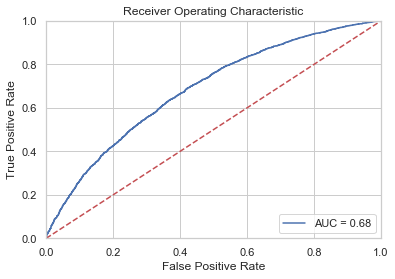

In [19]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df.index
X_mat = hstack([csr_matrix(df.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [20]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.731364,0.776107,0.740364,0.776107,0.894263


## Logistic Regression V2
- Essays
- Cost
- Number of previously submitted projects 

In [57]:
#Modify dataset 
df2 = X[X.columns[:2]]
df2

,teacher_number_of_previously_posted_projects,total_cost
0,-0.347540,-0.215827
1,-0.394577,0.408963
2,0.216899,-0.368895
3,-0.347540,-0.784582
4,-0.253467,-0.642221
...,...,...
93786,-0.394577,0.042727
93787,-0.347540,1.365825
93788,2.662801,-0.352729
93789,0.969484,-0.525169


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix:
 [[  747   998]
 [ 3246 13768]]


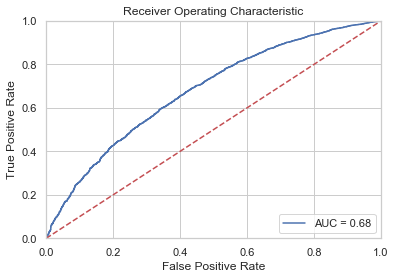

In [58]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df2.index
X_mat = hstack([csr_matrix(df2.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [59]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.728088,0.773762,0.737446,0.773762


## Logistic Regression v3

In [60]:
#Modify dataset 
df3 = X[X.columns[1:2]]
df3

,total_cost
0,-0.215827
1,0.408963
2,-0.368895
3,-0.784582
4,-0.642221
...,...
93786,0.042727
93787,1.365825
93788,-0.352729
93789,-0.525169


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix:
 [[  723  1022]
 [ 3216 13798]]


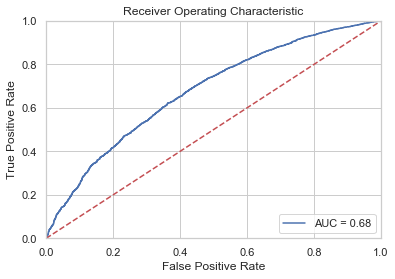

In [61]:
# DataFrame for result evaluation
from scipy.sparse import hstack, csr_matrix
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

Xtvec, ytvec = tfidf('essay', ngrams = 1)
traindex=df3.index
X_mat = hstack([csr_matrix(df3.loc[traindex,:].values),Xtvec[0:traindex.shape[0]]])

X_train, X_test, y_train, y_test = train_test_split(X_mat, ytvec, test_size=0.2, random_state=40)

X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [62]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.72769,0.774082,0.738265,0.774082
